In [47]:
The primary objective of this project is to optimize workforce efficiency and deployment by analyzing employee timesheets
and operational data across various regions. The analysis aims to answer key questions related to workforce demand, seasonal trends,
and regional alignment with job demands. By leveraging data from employee timesheets and other relevant sources, the project seeks to:

Determine the required employee hours per state to achieve monthly operational targets, ensuring optimal resource allocation.
    And 
To Identify seasonal trends that may influence workforce demand, enabling proactive planning and resource management.

SyntaxError: invalid syntax (4065588816.py, line 1)

In [48]:
#TO SHOW THE TIME SHEET TABLE and the DATA TABLE (UNFORMATTED)

In [1]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("HDFSDataAnalysis").getOrCreate()

# Specify the HDFS namenode host
namenode_host = "localhost"

# Load Employeetimesheet.csv into a Spark DataFrame
df_timesheet = spark.read.csv(f"hdfs://{namenode_host}:19000/rxiproject/project/Employeetimesheet.csv", header=True, inferSchema=True)

# Load data.csv into a Spark DataFrame
df_data = spark.read.csv(f"hdfs://{namenode_host}:19000/rxiproject/project/data.csv", header=True, inferSchema=True)

# Show the first 10 rows of each DataFrame
df_timesheet.show(10)
df_data.show(10)




+---------+---------+-------------------+-------------------+-----------+-----+----------+
|EMP_LNAME|EMP_FNAME|               DATE|         Month-Year| hrsWorked |State|Department|
+---------+---------+-------------------+-------------------+-----------+-----+----------+
|     Tate|   Nathan|2023-01-01 00:00:00|2023-01-01 00:00:00|9.966666667|  VIC|   FITTING|
|     Tate|   Nathan|2023-01-01 00:00:00|2023-01-01 00:00:00|9.416666667|  VIC|   FITTING|
|     Tate|   Nathan|2023-01-01 00:00:00|2023-01-01 00:00:00|       6.75|  VIC|   FITTING|
|     Tate|   Nathan|2023-01-01 00:00:00|2023-01-01 00:00:00|       9.25|  VIC|   FITTING|
|     Tate|   Nathan|2023-01-01 00:00:00|2023-01-01 00:00:00|9.016666667|  VIC|   FITTING|
|     Tate|   Nathan|2023-01-01 00:00:00|2023-01-01 00:00:00|8.916666667|  VIC|   FITTING|
|     Tate|   Nathan|2023-01-01 00:00:00|2023-01-01 00:00:00|        9.8|  VIC|   FITTING|
|     Tate|   Nathan|2023-01-01 00:00:00|2023-01-01 00:00:00|6.016666667|  VIC|   FITTING|

#TO SHOW THE FULLY ARRANGED TABLE OF DATA.CSV

In [49]:
# Import necessary libraries
import pandas as pd
from IPython.display import display, HTML
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("HDFSDataAnalysis").getOrCreate()

# Specify the HDFS namenode host
namenode_host = "localhost"

# Load data.csv into a Spark DataFrame
df_data = spark.read.csv(f"hdfs://{namenode_host}:19000/rxiproject/project/data.csv", header=True, inferSchema=True)

# Convert Spark DataFrame to Pandas DataFrame
pdf_data = df_data.toPandas()

# Adjust display settings to show all rows
pd.set_option('display.max_rows', None)

# Create an HTML representation of the DataFrame with custom CSS
html_table = pdf_data.to_html(index=False)
styled_html = f"""
    <style>
        table {{
            border-collapse: collapse;
            width: 100%;
        }}
        th, td {{
            border: 1px solid black;
            padding: 5px;
            text-align: left;
            font-size: 8px;
        }}
        th {{
            background-color: #f2f2f2;  /* Light gray background for table headers */
        }}
        td:nth-child(8) {{  /* Adjusting width for "Dealership Contact" column */
            width: 300px;
        }}
        td:nth-child(9) {{  /* Adjusting width for "Tags" column */
            width: 50px;
        }}
        tr:hover {{  /* Highlight row in blue when hovered */
            background-color: #e0f7fa;
        }}
    </style>
    {html_table}
"""

# Display the styled HTML table
display(HTML(styled_html))



Order Reference,Creation Date,Fitout Start Date,Fitout End Date,Build Name,Customer,End User,Dealership Contact,State,Vehicle Make,Vehicle Model,Job Status,Total
S00158,2023-04-26 07:05:00,2023-04-28,2023-04-28,Lock replacement - Aftersales,"Ventia Australia Pty Ltd, Debra Henwood",Ventia,"Aftersales/Cash/ Supply only, BARTON WILLIAMS",QLD,None,None,DONE,385
S00036,2023-03-16 06:33:00,2023-04-04,2023-04-18,OSS4 Bin,Sci Fleet Toyota,Rentokil,"Rentokil Initial Pty Ltd, Georgette McGarry",QLD,TOYOTA,HIACE 2023,DONE,"9,792.20"
S00207,2023-05-01 10:16:00,2023-05-29,2023-05-30,FE Portable - Airport Project,Orix Australia Corp Ltd,Wormald,None,NSW,TOYOTA,HIACE 2023,DONE,"11,632.50"
S00421,2023-05-25 10:36:00,2023-05-29,2023-05-29,Towbar and Air vent addition-Aftersales,"Orix Australia Corp Ltd, Louise Guest",Equans,"Aftersales/Cash/ Supply only, BARTON WILLIAMS",NSW,None,None,DONE,"1,593.90"
S00390,2023-05-19 10:57:00,2023-05-24,2023-05-25,Electrical labour-Aftersales,Cash Sale,.,"Aftersales/Cash/ Supply only, BARTON WILLIAMS",NSW,None,None,DONE,250
S00298,2023-05-11 09:18:00,2023-05-18,2023-05-31,City Holdings MB Crew Cab,"Interleasing, Bruno Hrstic",City FM,None,NSW,MERCEDES BENZ,VITO 2023,DONE,"12,460.80"
S00199/1,2023-05-01 06:27:00,2023-05-15,2023-05-15,VIC Decals-Aftersales,Carryboy,City FM,"Aftersales/Cash/ Supply only, BARTON WILLIAMS",VIC,None,None,DONE,"11,704.00"
S00273,2023-05-09 05:49:00,2023-05-22,2023-05-26,FE Portable Hiace,Orix Australia Corp Ltd,Wormald,"Terry Shields Toyota, Fleet",NSW,None,None,DONE,"11,632.50"
S00257,2023-05-08 13:06:00,2023-05-08,2023-05-08,Additions to J77382-Aftersales,Orix Australia Corp Ltd,Equans,"Aftersales/Cash/ Supply only, BARTON WILLIAMS",NSW,MITSUBISHI,TRITON 2022,DONE,"1,505.90"
S00048,2023-04-11 10:03:00,2023-05-11,2023-05-11,Ian Morris - Vocus Extras,Vocus Group,Vocus,"Berwick Ford, Alysia Hunter",VIC,FORD,RANGER 2023,DONE,"4,571.60"


In [3]:
#TO SHOW TOTALS PER MONTH / PER LOCATION /Total Number of Jobs

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace, concat, lit
import pandas as pd
from IPython.display import display

# Initialize Spark session
spark = SparkSession.builder.appName("HDFSDataAnalysis").getOrCreate()

# Specify the HDFS namenode host
namenode_host = "localhost"

# Load FitmentTotalPermonth.csv into a Spark DataFrame
df_spark = spark.read.csv(f"hdfs://{namenode_host}:19000/rxiproject/project/FitmentTotalPermonth.csv", header=True, inferSchema=True)

# Show the schema to verify data load
df_spark.printSchema()

# Filter out any rows with null values
filtered_df = df_spark.na.drop()

# Format the 'Total' column by inserting commas and adding a dollar sign
formatted_df = filtered_df.withColumn(
    'Total',
    concat(
        lit('$'),
        regexp_replace('Total', r'(\d)(?=(\d{3})+(?!\d))', r'\1,')
    )
)

# Reorder columns with 'State' and 'CountofJobs' in the middle
column_order = ['Month', 'State', 'CountofJobs', 'Total']
reordered_df = formatted_df.select(column_order)

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = reordered_df.toPandas()

# Set display options for a more compact view
pd.set_option('display.max_colwidth', None)  # Ensure full values are visible
pd.set_option('display.colheader_justify', 'center')

# Display the DataFrame in Jupyter Notebook
display(pandas_df)  # For Jupyter Notebook or IPython environment

# For terminal display with full values (comment this out if using Jupyter)
# df_str = pandas_df.to_string(index=False)  # No col_space adjustment
# print(df_str)





root
 |-- Month: date (nullable = true)
 |-- State: string (nullable = true)
 |-- CountofJobs: integer (nullable = true)
 |-- Total: double (nullable = true)
 |-- TotalEmpHours: double (nullable = true)



,Month,State,CountofJobs,Total
0,2023-07-30,NSW,36,"$191,239.25"
1,2023-07-30,WA,4,"$61,030.1"
2,2023-07-30,QLD,3,"$1,557.1"
3,2023-07-30,SA,8,"$61,099.3"
4,2023-07-30,VIC,17,"$91,770.7"
5,2023-08-30,NSW,48,"$361,058.95"
6,2023-08-30,WA,3,"$21,027.0"
7,2023-08-30,QLD,16,"$381,922.86"
8,2023-08-30,SA,7,"$71,650.2"
9,2023-08-30,VIC,30,"$571,221.8"


In [ ]:
#TOTAL Jobs per State per Month

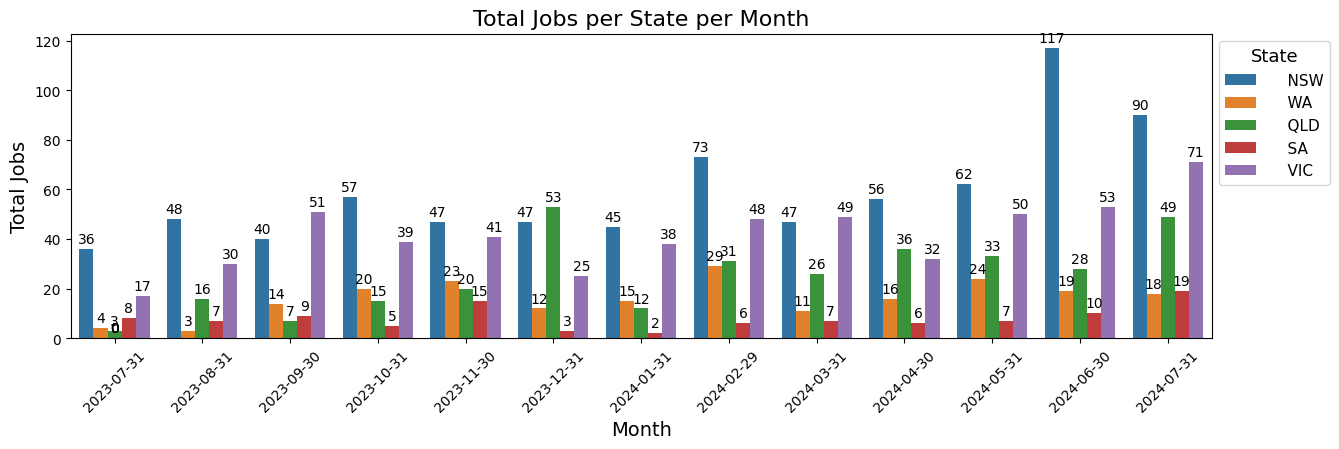

In [45]:
# from pyspark.sql import SparkSession
# from pyspark.sql.functions import regexp_replace, concat, lit, col, last_day
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Initialize Spark session
spark = SparkSession.builder.appName("HDFSDataAnalysis").getOrCreate()

# Specify the HDFS namenode host
namenode_host = "localhost"

# Load the CSV files from HDFS
fitment_df = spark.read.csv(f"hdfs://{namenode_host}:19000/rxiproject/project/FitmentTotalPermonth.csv", header=True, inferSchema=True)
data_df = spark.read.csv(f"hdfs://{namenode_host}:19000/rxiproject/project/data.csv", header=True, inferSchema=True)
timesheet_df = spark.read.csv(f"hdfs://{namenode_host}:19000/rxiproject/project/Employeetimesheet.csv", header=True, inferSchema=True)

# Convert Spark DataFrames to Pandas DataFrames for further processing
fitment_df = fitment_df.toPandas()
data_df = data_df.toPandas()
timesheet_df = timesheet_df.toPandas()

# Format the 'Total' column in Pandas DataFrame
fitment_df['Total'] = fitment_df['Total'].apply(lambda x: f"${float(x):,.0f}" if pd.notnull(x) else "$0")

# Convert 'Month' to datetime and set to end of month
fitment_df['Month'] = pd.to_datetime(fitment_df['Month'], format='%Y-%m').dt.to_period('M').dt.to_timestamp('M')

# Print the formatted fitment DataFrame to verify changes
# print("Formatted FitmentTotalPermonth DataFrame:")
# print(fitment_df.head())

# Convert Spark DataFrame 'Month' to end of month
df_spark = spark.read.csv(f"hdfs://{namenode_host}:19000/rxiproject/project/FitmentTotalPermonth.csv", header=True, inferSchema=True)
df_spark = df_spark.withColumn('Month', last_day(col('Month')))

# Format the 'Total' column in Spark DataFrame
df_spark = df_spark.withColumn(
    'Total',
    concat(
        lit('$'),
        regexp_replace('Total', r'(\d)(?=(\d{3})+(?!\d))', r'\1,')
    )
)

# Convert to Pandas for plotting
formatted_df = df_spark.toPandas()

# Plotting
plt.figure(figsize=(18, 12))

# Plot Total Jobs per State
plt.subplot(3, 1, 1)
ax = sns.barplot(x='Month', y='CountofJobs', hue='State', data=formatted_df)
plt.title('Total Jobs per State per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Jobs', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='State', title_fontsize='13', fontsize='11', ncol=1)  # Vertical legend

# Add values on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}",
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',  # Place text at the top of the bar
                xytext=(0, 2),  # Slight adjustment to ensure the text is not on top of the bar
                textcoords='offset points')



plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust layout to make space for the legend
plt.show()




In [ ]:
#TOTAL SALES VS TOTAL HOURS

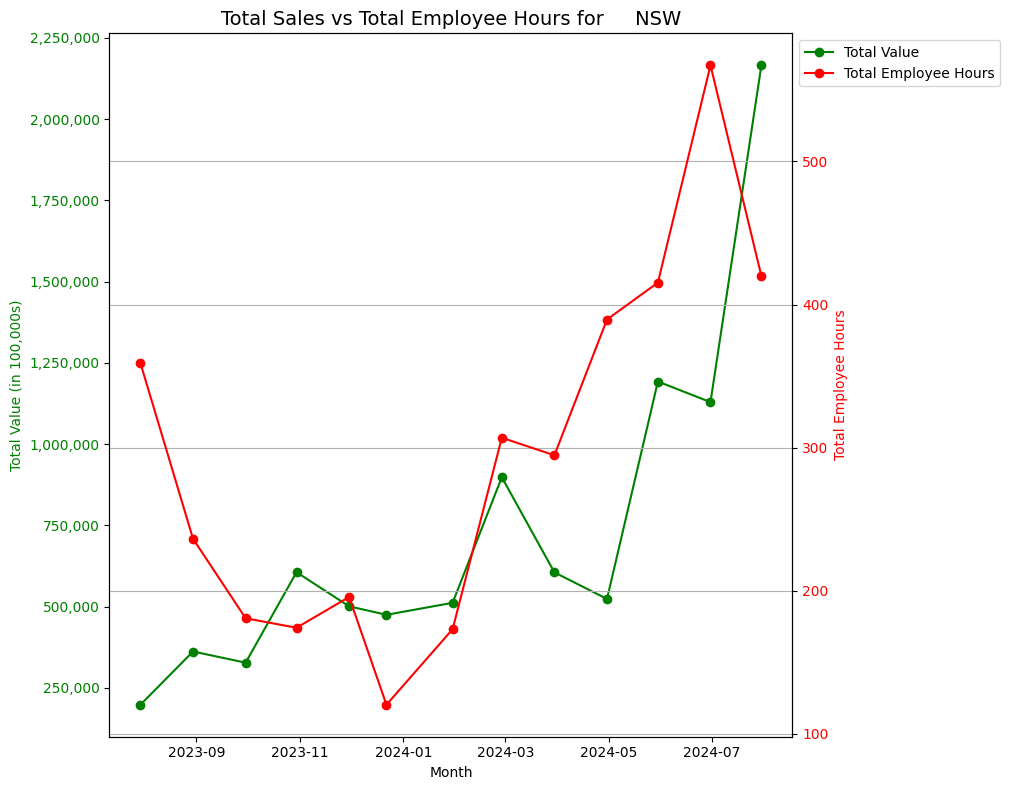

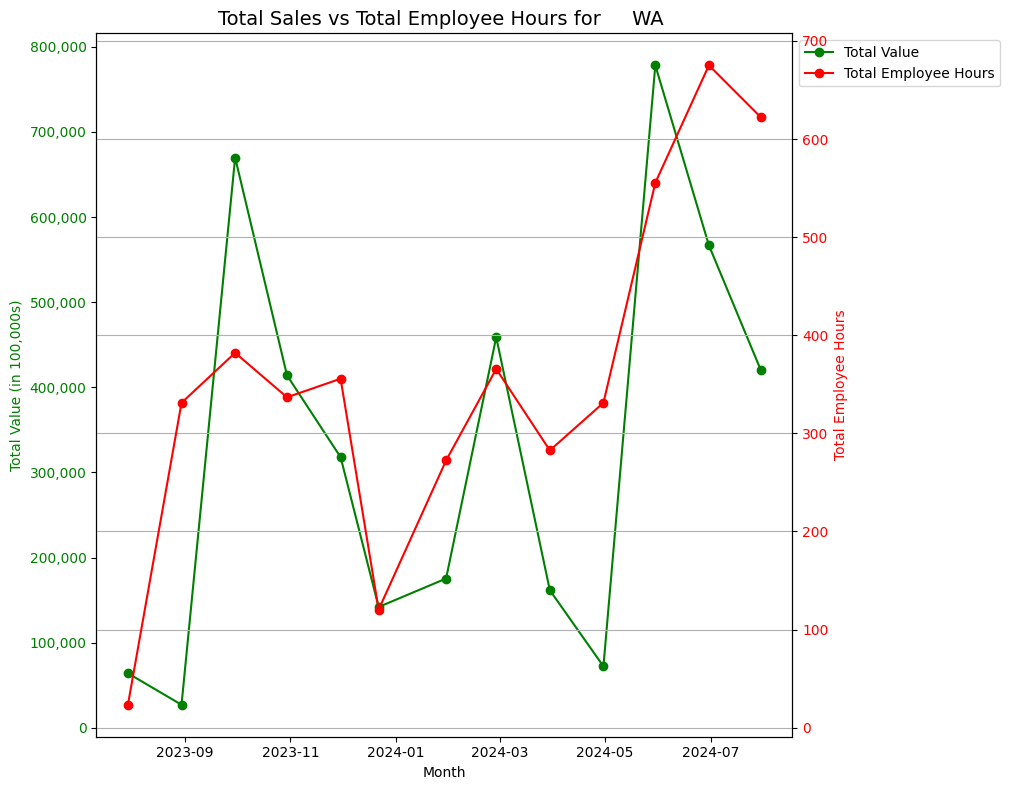

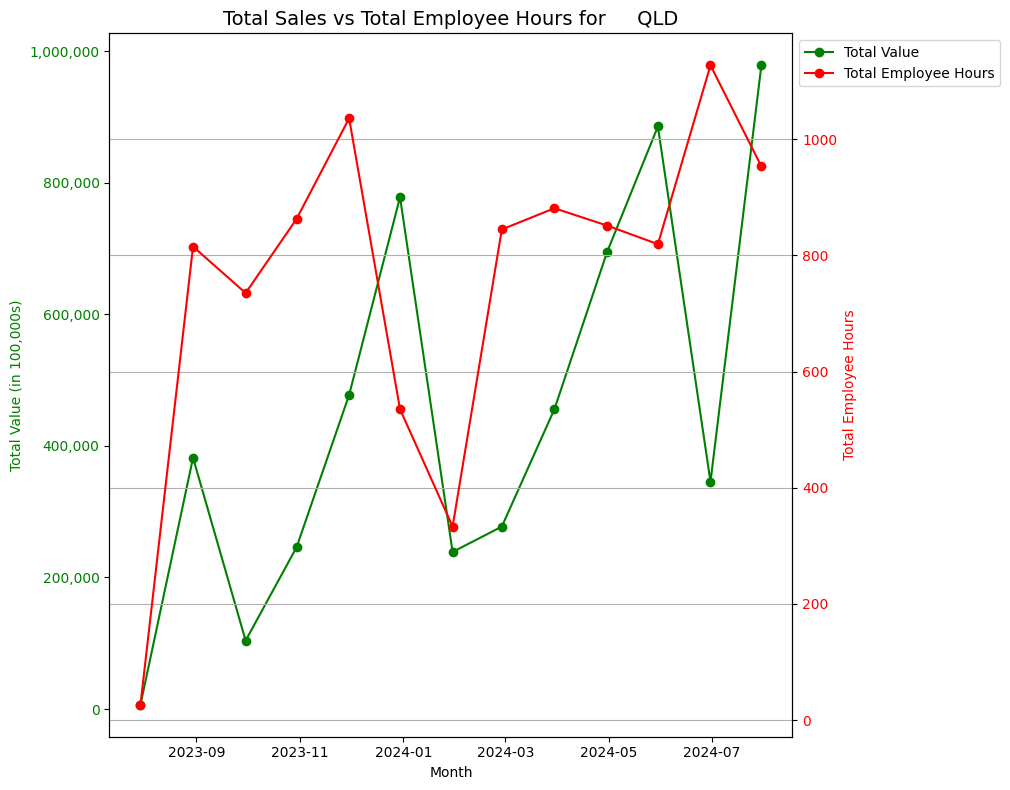

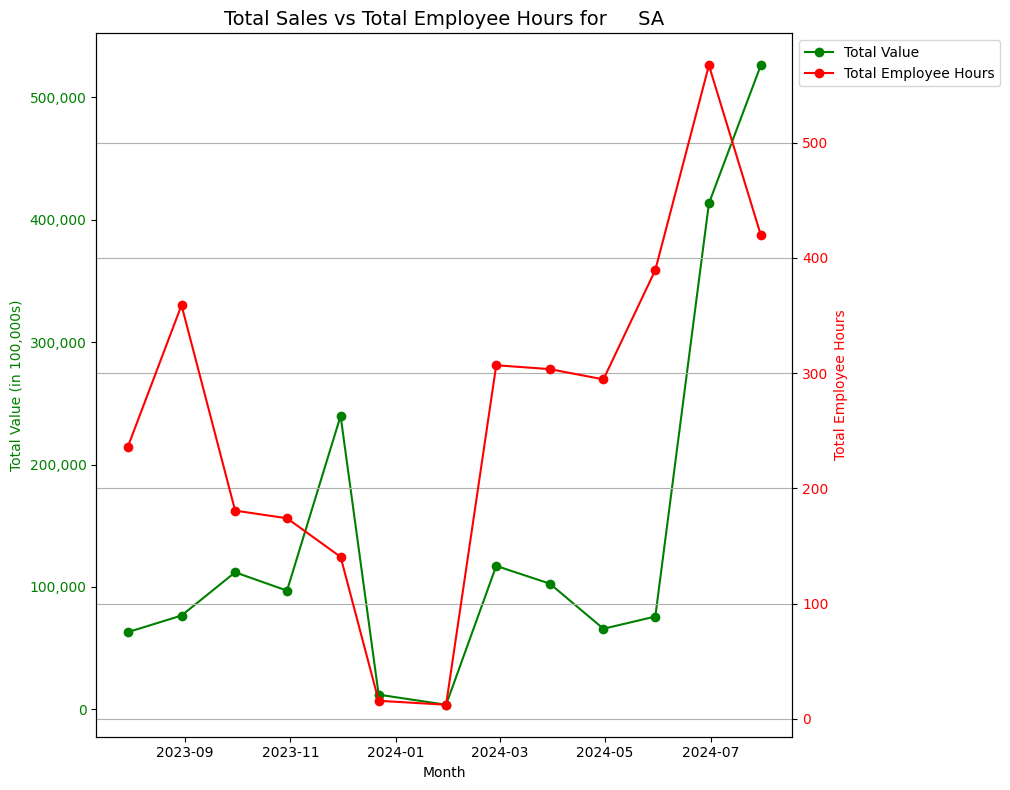

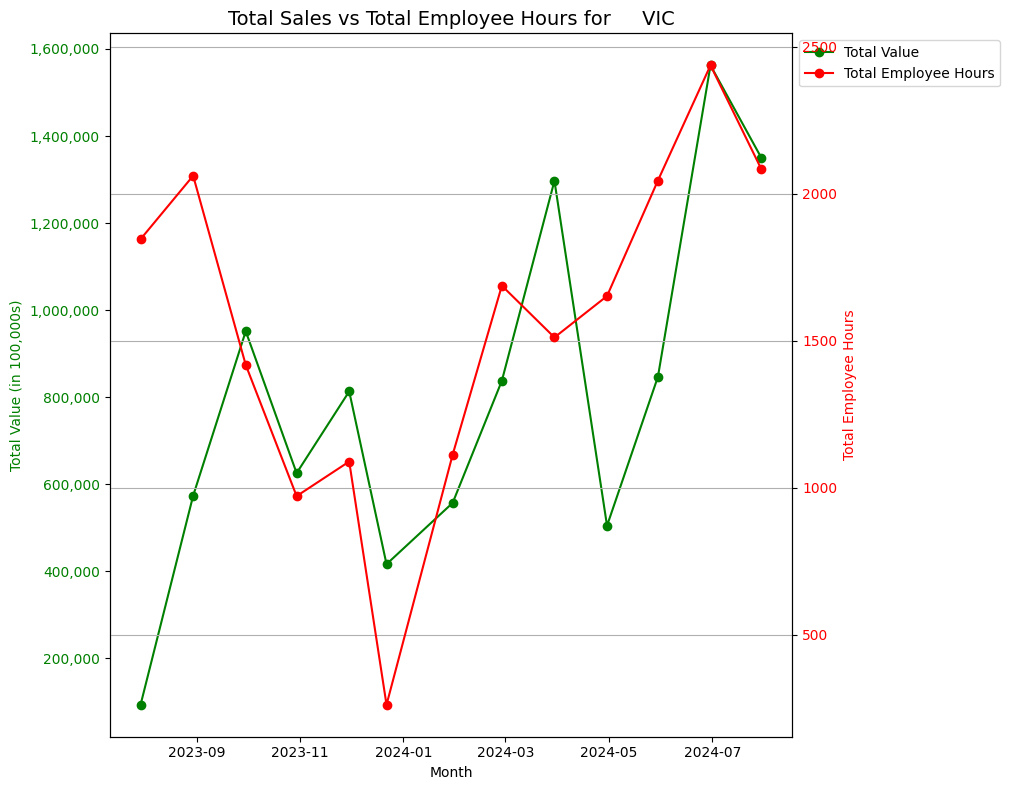

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Load the CSV file
file_path = 'FitmentTotalPermonth.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Convert the 'Month' column to datetime
data['Month'] = pd.to_datetime(data['Month'])

# List of unique states in the dataset
states = data['State'].unique()

# Create combined time series plots with dual y-axes for each state
for state in states:
    state_data = data[data['State'] == state]
    
    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 8))
    
    # Plot Total Value on the primary y-axis, scaled per 100,000
    line1 = ax1.plot(state_data['Month'], state_data['Total'] / 100000, marker='o', linestyle='-', color='g', label='Total Value')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Total Value (in 100,000s)', color='g')
    ax1.tick_params(axis='y', labelcolor='g')
    
    # Set the ticks and labels
    y_ticks = ax1.get_yticks()  # Get the default tick locations
    ax1.yaxis.set_major_locator(FixedLocator(y_ticks))
    ax1.set_yticklabels([f'{int(label*100000):,}' for label in y_ticks])
    
    # Create a secondary y-axis to plot Total Employee Hours
    ax2 = ax1.twinx()
    line2 = ax2.plot(state_data['Month'], state_data['TotalEmpHours'], marker='o', linestyle='-', color='r', label='Total Employee Hours')
    ax2.set_ylabel('Total Employee Hours', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Combine legends from both axes
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1, 1))
    
    # Add a title and grid
    plt.title(f'Total Sales vs Total Employee Hours for {state}', fontsize=14)
    fig.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to accommodate the legend
    plt.grid(True)
    plt.show()



In [ ]:
#Table form per State on Total Sales, per month and Total Employee Hours

In [44]:
import pandas as pd
from prettytable import PrettyTable

# Load the CSV file
file_path = 'FitmentTotalPermonth.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Convert the 'Month' column to datetime
data['Month'] = pd.to_datetime(data['Month'])

# List of unique states in the dataset
states = data['State'].unique()

# Create a summary table for each state using PrettyTable
for state in states:
    state_data = data[data['State'] == state]
    
    # Create a PrettyTable object
    table = PrettyTable()
    table.field_names = ["Month", "Total", "Total Employee Hours"]
    
    # Add rows to the PrettyTable
    for _, row in state_data.iterrows():
        table.add_row([row['Month'].strftime('%Y-%m-%d'), f"${row['Total']:,.0f}", f"{row['TotalEmpHours']:.1f} hrs"])
    
    # Set table title
    table.title = f"Summary Table for {state}"
    
    # Print the table
    print(table)





+------------------------------------------------+
|           Summary Table for     NSW            |
+------------+------------+----------------------+
|   Month    |   Total    | Total Employee Hours |
+------------+------------+----------------------+
| 2023-07-30 |  $198,239  |      359.1 hrs       |
| 2023-08-30 |  $362,059  |      236.3 hrs       |
| 2023-09-30 |  $327,724  |      180.8 hrs       |
| 2023-10-30 |  $606,049  |      174.1 hrs       |
| 2023-11-30 |  $501,053  |      195.6 hrs       |
| 2023-12-22 |  $474,989  |      120.3 hrs       |
| 2024-01-30 |  $511,936  |      173.1 hrs       |
| 2024-02-28 |  $898,399  |      306.9 hrs       |
| 2024-03-30 |  $605,647  |      294.7 hrs       |
| 2024-04-30 |  $523,756  |      389.6 hrs       |
| 2024-05-30 | $1,192,821 |      415.3 hrs       |
| 2024-06-30 | $1,129,440 |      567.2 hrs       |
| 2024-07-30 | $2,165,828 |      420.0 hrs       |
+------------+------------+----------------------+
+------------------------------

In [ ]:
#To show the minimum required employee hours to meet the target

In [20]:
import pandas as pd

# Load the CSV file
file_path = 'FitmentTotalPermonth.csv'  
data = pd.read_csv(file_path)

# Convert the 'Month' column to datetime
data['Month'] = pd.to_datetime(data['Month'])

# Filter the data for January 2024 to July 2024 only
filtered_data = data[(data['Month'] >= '2024-01-01') & (data['Month'] <= '2024-07-31')].copy()

# Clean up the state names by stripping any extra spaces
filtered_data.loc[:, 'State'] = filtered_data['State'].str.strip()

# Let's first inspect the filtered data for all states
nsw_data = filtered_data[filtered_data['State'] == 'NSW']
vic_data = filtered_data[filtered_data['State'] == 'VIC']
qld_data = filtered_data[filtered_data['State'] == 'QLD']
sa_data = filtered_data[filtered_data['State'] == 'SA']
wa_data = filtered_data[filtered_data['State'] == 'WA']
print(nsw_data)
print(vic_data)
print(qld_data)
print(sa_data)
print(wa_data)


# Calculate the average number of jobs for NSW
avg_total_jobs_nsw = nsw_data['CountofJobs'].mean()
print(f"Average Total Jobs in NSW: {avg_total_jobs_nsw}")
avg_total_jobs_vic = vic_data['CountofJobs'].mean()
print(f"Average Total Jobs in VIC: {avg_total_jobs_vic}")
avg_total_jobs_qld = qld_data['CountofJobs'].mean()
print(f"Average Total Jobs in QLD: {avg_total_jobs_qld}")
avg_total_jobs_sa = sa_data['CountofJobs'].mean()
print(f"Average Total Jobs in SA: {avg_total_jobs_sa}")
avg_total_jobs_wa = wa_data['CountofJobs'].mean()
print(f"Average Total Jobs in WA: {avg_total_jobs_wa}")

# Define monthly targets per state
monthly_targets = {
    'NSW': 1000000,  # Target for NSW
    'VIC': 1500000,  # Target for VIC
    'QLD': 9000000,  # Target for QLD
    'WA': 400000,    # Target for WA
    'SA': 250000     # Target for SA
}

# Calculate average productivity, required employee hours, and average total jobs
results = []
for state in filtered_data['State'].unique():
    state_data = filtered_data[filtered_data['State'] == state]
    
    # Calculate the total value, total employee hours, and average total jobs over the period
    total_value = state_data['Total'].sum()
    total_emp_hours = state_data['TotalEmpHours'].sum()
    avg_total_jobs = state_data['CountofJobs'].mean()
    
    # Calculate the average productivity
    avg_productivity = total_value / total_emp_hours if total_emp_hours != 0 else 0
    
    # Calculate the required employee hours to meet the monthly target
    required_emp_hours = monthly_targets[state] / avg_productivity if avg_productivity != 0 else 0
    
    results.append({
        'State': state,
        'Monthly Target': f"${monthly_targets[state]:,.0f}",
        'Total Value': f"${total_value:,.0f}",
        'Total Employee Hours': total_emp_hours,
        'Average Total Jobs': f"{avg_total_jobs:.2f}",
        'Average Productivity (per hour)': f"${avg_productivity:,.2f}" if avg_productivity != 0 else "N/A",
        'Required Employee Hours': f"{required_emp_hours:.2f} hours" if required_emp_hours != 0 else "N/A"
    })

# Convert results to DataFrame for display
results_df = pd.DataFrame(results)

# Display the results
results_df




     Month    State  CountofJobs     Total    TotalEmpHours
30 2024-01-30   NSW       45       511936.47     173.10    
35 2024-02-28   NSW       73       898399.36     306.93    
40 2024-03-30   NSW       47       605646.80     294.66    
45 2024-04-30   NSW       56       523755.65     389.56    
50 2024-05-30   NSW       62      1192820.75     415.32    
55 2024-06-30   NSW      117      1129440.18     567.22    
60 2024-07-30   NSW       90      2165828.28     419.98    
     Month    State  CountofJobs     Total    TotalEmpHours
34 2024-01-30   VIC      38        556774.90     1112.15   
39 2024-02-28   VIC      48        837426.17     1686.68   
44 2024-03-30   VIC      49       1297009.30     1510.73   
49 2024-04-30   VIC      32        504280.04     1651.52   
54 2024-05-30   VIC      50        846502.49     2044.37   
59 2024-06-30   VIC      53       1562500.45     2436.35   
64 2024-07-30   VIC      71       1349672.15     2082.73   
     Month    State  CountofJobs    Tota

,State,Monthly Target,Total Value,Total Employee Hours,Average Total Jobs,Average Productivity (per hour),Required Employee Hours
0,NSW,"$1,000,000","$7,027,827",2566.77,70.00,"$2,738.00",365.23 hours
1,WA,"$400,000","$2,632,971",3104.52,18.86,$848.11,471.64 hours
2,QLD,"$9,000,000","$3,875,411",5811.17,30.71,$666.89,13495.48 hours
3,SA,"$250,000","$1,304,728",2294.21,8.14,$568.70,439.60 hours
4,VIC,"$1,500,000","$6,954,166",12524.53,48.71,$555.24,2701.52 hours


In [ ]:
#The sum of all employee hours per state, and sum of all jobs per state for the year

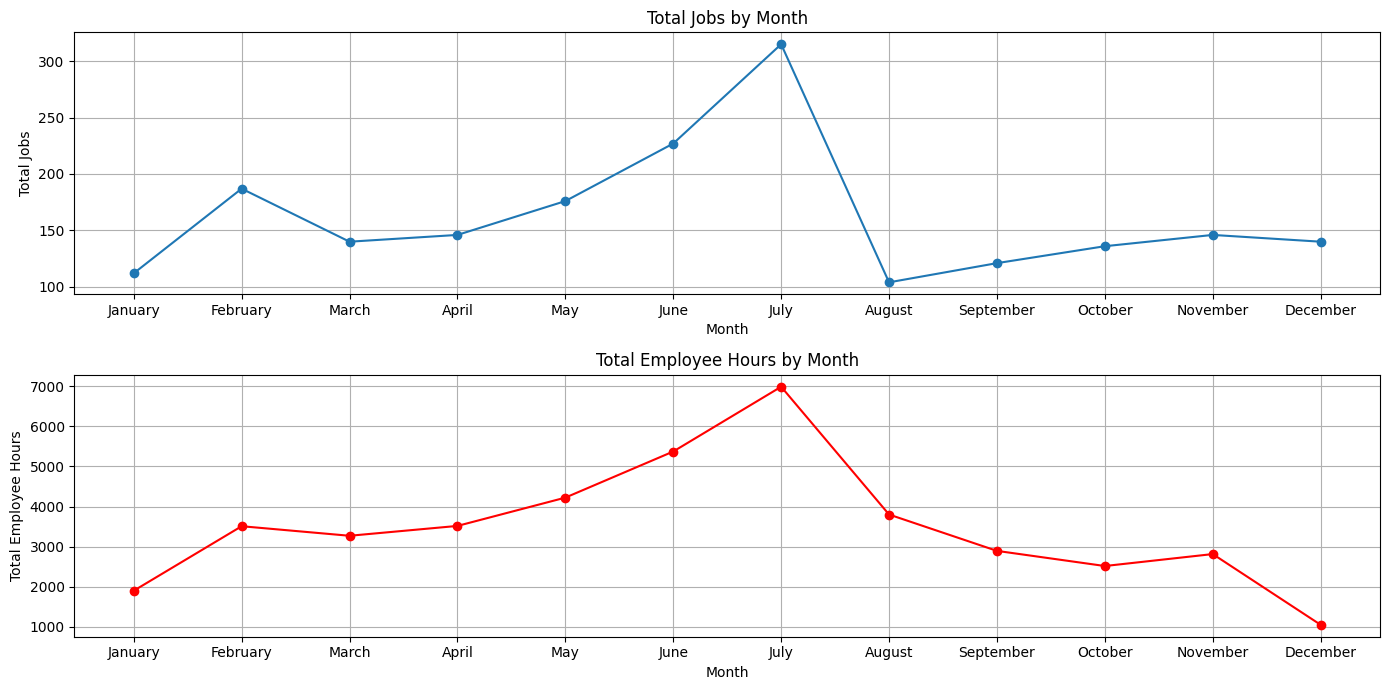

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'FitmentTotalPermonth.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Convert the 'Month' column to datetime
data['Month'] = pd.to_datetime(data['Month'])

# Extract the month for seasonal analysis
data['Month_Num'] = data['Month'].dt.month
data['Month_Name'] = data['Month'].dt.strftime('%B')

# Summarize the data by month to see trends
monthly_summary = data.groupby(['Month_Num', 'Month_Name']).agg({
    'CountofJobs': 'sum',
    'TotalEmpHours': 'sum'
}).reset_index()

# Sort by Month_Num to ensure proper order
monthly_summary = monthly_summary.sort_values('Month_Num')

# Display the monthly summary
monthly_summary

# Plotting the total jobs and employee hours by month to identify trends
plt.figure(figsize=(14, 7))

# Plot Total Jobs
plt.subplot(2, 1, 1)
plt.plot(monthly_summary['Month_Name'], monthly_summary['CountofJobs'], marker='o')
plt.title('Total Jobs by Month')
plt.xlabel('Month')
plt.ylabel('Total Jobs')
plt.grid(True)

# Plot Total Employee Hours
plt.subplot(2, 1, 2)
plt.plot(monthly_summary['Month_Name'], monthly_summary['TotalEmpHours'], marker='o', color='r')
plt.title('Total Employee Hours by Month')
plt.xlabel('Month')
plt.ylabel('Total Employee Hours')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#To Show the total jobs completed versus the number of Hours consumed by the employees

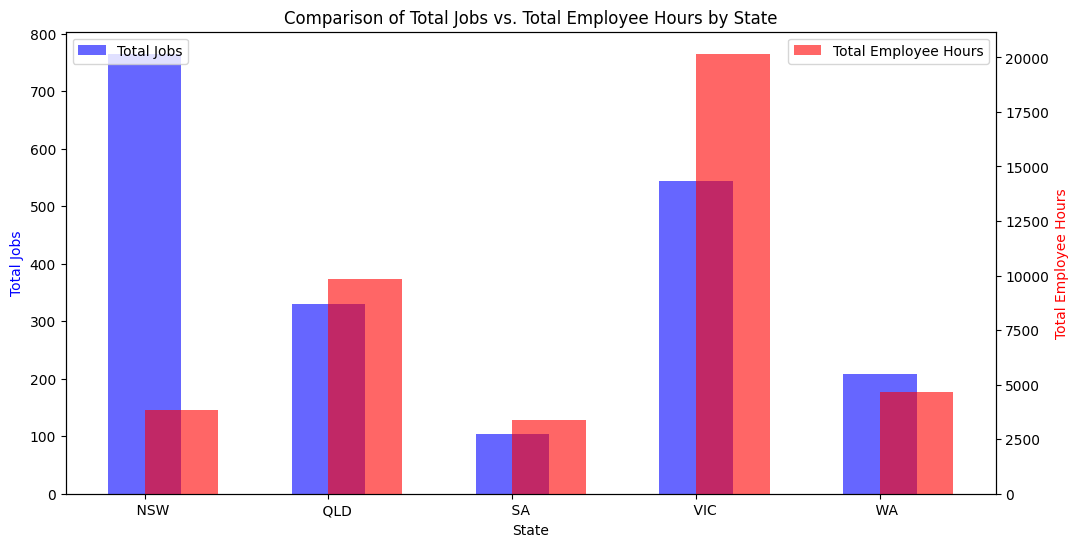

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'FitmentTotalPermonth.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Convert the 'Month' column to datetime
data['Month'] = pd.to_datetime(data['Month'])

# Summarize the total jobs and employee hours by state
state_summary = data.groupby('State').agg({
    'CountofJobs': 'sum',
    'TotalEmpHours': 'sum'
}).reset_index()

# Calculate the ratio of employee hours to jobs (Workforce Deployment per Job)
state_summary['Hours per Job'] = state_summary['TotalEmpHours'] / state_summary['CountofJobs']

# Plot Total Jobs and Total Employee Hours side by side for comparison
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Total Jobs
ax1.bar(state_summary['State'], state_summary['CountofJobs'], label='Total Jobs', alpha=0.6, color='b', width=0.4, align='center')

# Create another y-axis for the Employee Hours on the same plot
ax2 = ax1.twinx()
ax2.bar(state_summary['State'], state_summary['TotalEmpHours'], label='Total Employee Hours', alpha=0.6, color='r', width=0.4, align='edge')

# Set labels and titles
ax1.set_xlabel('State')
ax1.set_ylabel('Total Jobs', color='b')
ax2.set_ylabel('Total Employee Hours', color='r')
ax1.set_title('Comparison of Total Jobs vs. Total Employee Hours by State')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# Plotting Hours per Job ratio to check alignment
# plt.figure(figsize=(10, 6))
# plt.bar(state_summary['State'], state_summary['Hours per Job'], color='purple', alpha=0.7)
# plt.xlabel('State')
# plt.ylabel('Hours per Job')
# plt.title('Workforce Deployment per Job by State')
# plt.grid(True)
# plt.show()


In [ ]:
#Recommendation for Number of Hours +20% Buffer

In [40]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, trim
from IPython.display import display, HTML  # Correct import statement

# Initialize Spark Session
spark = SparkSession.builder.appName("Employee Hours Calculation").getOrCreate()

# Load the data into a Spark DataFrame
df_spark = spark.read.csv("hdfs://localhost:19000/rxiproject/project/FitmentTotalPermonth.csv", header=True, inferSchema=True)

# Filter data for the period from January 2024 to July 2024
filtered_df = df_spark.filter((col("Month") >= "2024-01-01") & (col("Month") <= "2024-07-31"))

# Strip extra spaces from State names
filtered_df = filtered_df.withColumn("State", trim(col("State")))

# Define monthly targets per state
monthly_targets = {
    'NSW': 1000000,
    'VIC': 1500000,
    'QLD': 900000,
    'WA': 400000,
    'SA': 250000
}

# Buffer factor
buffer_factor = 1.20

# Calculate productivity, required hours, and apply buffer
results = []
for state, target in monthly_targets.items():
    state_data = filtered_df.filter(col("State") == state)
    
    total_value = state_data.agg({"Total": "sum"}).collect()[0][0]
    total_emp_hours = state_data.agg({"TotalEmpHours": "sum"}).collect()[0][0]
    
    avg_productivity = total_value / total_emp_hours if total_emp_hours != 0 else 0
    required_emp_hours = target / avg_productivity if avg_productivity != 0 else 0
    required_emp_hours_with_buffer = required_emp_hours * buffer_factor
    
    results.append((
        state, 
        f"${target:,.0f}", 
        f"${total_value:,.0f}", 
        f"{total_emp_hours:,.2f} hours", 
        f"${avg_productivity:,.2f} per hour", 
        f"{required_emp_hours:,.2f} hours", 
        f"{required_emp_hours_with_buffer:,.2f} hours"
    ))

# Convert results to DataFrame
columns = ["State", "Monthly Target", "Total Value", "Total Emp Hours", "Productivity Average", "Required Emp Hours", "Recommended Emp Hours + 20% Buffer"]
results_df_spark = spark.createDataFrame(results, columns)

# Convert the Spark DataFrame to Pandas DataFrame for easier HTML rendering
results_df_pandas = results_df_spark.toPandas()

# Generate HTML table with inline CSS for styling
html_output = results_df_pandas.to_html(classes='table table-striped', index=False, justify='center')

# Define enhanced CSS for better visualization
css_style = """
<style>
    .table {
        width: 80%;
        margin: 50px auto;
        border-collapse: collapse;
        font-family: 'Trebuchet MS', sans-serif;
        font-size: 18px;
        color: #333;
        font-weight: bold;
    }
    .table thead th {
        background-color: #4CAF50;
        color: white;
        padding: 10px;
        text-align: center;
        font-weight: bolder;
        font-size: 14px;  /* Increased font size for headers */
    }
    .table tbody td {
        padding: 14px;
        text-align: center;
        border-bottom: 1px solid #ddd;
    }
    .table tbody tr:hover {
        background-color: #ADD8E6;  /* Change hover color to light blue */
    }
</style>
"""

# Combine CSS and HTML table
html_output = css_style + html_output

# Display the HTML output
display(HTML(html_output))




State,Monthly Target,Total Value,Total Emp Hours,Productivity Average,Required Emp Hours,Recommended Emp Hours + 20% Buffer
NSW,"$1,000,000","$7,027,827","2,566.77 hours","$2,738.00 per hour",365.23 hours,438.28 hours
VIC,"$1,500,000","$6,954,166","12,524.53 hours",$555.24 per hour,"2,701.52 hours","3,241.82 hours"
QLD,"$900,000","$3,875,411","5,811.17 hours",$666.89 per hour,"1,349.55 hours","1,619.46 hours"
WA,"$400,000","$2,632,971","3,104.52 hours",$848.11 per hour,471.64 hours,565.96 hours
SA,"$250,000","$1,304,728","2,294.21 hours",$568.70 per hour,439.60 hours,527.51 hours


In [ ]:
#Recommendation for Number of Hours during the Holidays

In [42]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, trim
from IPython.display import display, HTML

# Initialize Spark Session
spark = SparkSession.builder.appName("Employee Hours Calculation").getOrCreate()

# Load the data into a Spark DataFrame
df_spark = spark.read.csv("hdfs://localhost:19000/rxiproject/project/FitmentTotalPermonth.csv", header=True, inferSchema=True)

# Filter data for the period from January 2024 to July 2024
filtered_df = df_spark.filter((col("Month") >= "2024-01-01") & (col("Month") <= "2024-07-31"))

# Strip extra spaces from State names
filtered_df = filtered_df.withColumn("State", trim(col("State")))

# Define monthly targets per state
monthly_targets = {
    'NSW': 1000000,
    'VIC': 1500000,
    'QLD': 900000,
    'WA': 400000,
    'SA': 250000
}

# Calculate productivity, required hours for full month, and then double for 2 weeks
results = []
for state, target in monthly_targets.items():
    state_data = filtered_df.filter(col("State") == state)
    
    total_value = state_data.agg({"Total": "sum"}).collect()[0][0]
    total_emp_hours = state_data.agg({"TotalEmpHours": "sum"}).collect()[0][0]
    
    avg_productivity = total_value / total_emp_hours if total_emp_hours != 0 else 0
    required_emp_hours_full_month = target / avg_productivity if avg_productivity != 0 else 0
    required_emp_hours_two_weeks = required_emp_hours_full_month * 2  # Double the hours for 2 weeks
    
    results.append((
        state, 
        f"${target:,.0f}", 
        f"{required_emp_hours_two_weeks:,.2f} hours"
    ))

# Convert results to DataFrame
columns = ["State", "Monthly Target", "Required Emp Hours (2 Weeks)"]
results_df_spark = spark.createDataFrame(results, columns)

# Convert the Spark DataFrame to Pandas DataFrame for easier HTML rendering
results_df_pandas = results_df_spark.toPandas()

# Generate HTML table with inline CSS for styling
html_output = results_df_pandas.to_html(classes='table table-striped', index=False, justify='center')

# Define enhanced CSS for better visualization
css_style = """
<style>
    .table {
        width: 80%;
        margin: 50px auto;
        border-collapse: collapse;
        font-family: 'Trebuchet MS', sans-serif;
        font-size: 18px;
        color: #333;
        font-weight: bold;
    }
    .table thead th {
        background-color: #4CAF50;
        color: white;
        padding: 10px;
        text-align: center;
        font-weight: bolder;
        font-size: 14px;
    }
    .table tbody td {
        padding: 14px;
        text-align: center;
        border-bottom: 1px solid #ddd;
    }
    .table tbody tr:hover {
        background-color: #ADD8E6;  /* Change hover color to light blue */
    }
</style>
"""

# Combine CSS and HTML table
html_output = css_style + html_output

# Display the HTML output
display(HTML(html_output))



State,Monthly Target,Required Emp Hours (2 Weeks)
NSW,"$1,000,000",730.46 hours
VIC,"$1,500,000","5,403.03 hours"
QLD,"$900,000","2,699.10 hours"
WA,"$400,000",943.27 hours
SA,"$250,000",879.19 hours


In [ ]:
#Recommended Hours during Peak Months

In [43]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, trim
from IPython.display import display, HTML

# Initialize Spark Session
spark = SparkSession.builder.appName("Employee Hours Calculation").getOrCreate()

# Load the data into a Spark DataFrame
df_spark = spark.read.csv("hdfs://localhost:19000/rxiproject/project/FitmentTotalPermonth.csv", header=True, inferSchema=True)

# Filter data for the period from January 2024 to July 2024
filtered_df = df_spark.filter((col("Month") >= "2024-01-01") & (col("Month") <= "2024-07-31"))

# Strip extra spaces from State names
filtered_df = filtered_df.withColumn("State", trim(col("State")))

# Define monthly targets per state with a 30% increase for fiscal year-end
monthly_targets = {
    'NSW': 1000000 * 1.30,  # 30% increase
    'VIC': 1500000 * 1.30,
    'QLD': 900000 * 1.30,
    'WA': 400000 * 1.30,
    'SA': 250000 * 1.30
}

# Calculate productivity and required hours with the increased targets
results = []
for state, target in monthly_targets.items():
    state_data = filtered_df.filter(col("State") == state)
    
    total_value = state_data.agg({"Total": "sum"}).collect()[0][0]
    total_emp_hours = state_data.agg({"TotalEmpHours": "sum"}).collect()[0][0]
    
    avg_productivity = total_value / total_emp_hours if total_emp_hours != 0 else 0
    required_emp_hours = target / avg_productivity if avg_productivity != 0 else 0
    
    results.append((
        state, 
        f"${target:,.0f}", 
        f"${total_value:,.0f}", 
        f"{total_emp_hours:,.2f} hours", 
        f"${avg_productivity:,.2f} per hour", 
        f"{required_emp_hours:,.2f} hours"
    ))

# Convert results to DataFrame
columns = ["State", "Adjusted Target (30% Increase)", "Total Value", "Total Emp Hours", "Productivity Average", "Required Emp Hours"]
results_df_spark = spark.createDataFrame(results, columns)

# Convert the Spark DataFrame to Pandas DataFrame for easier HTML rendering
results_df_pandas = results_df_spark.toPandas()

# Generate HTML table with inline CSS for styling
html_output = results_df_pandas.to_html(classes='table table-striped', index=False, justify='center')

# Define enhanced CSS for better visualization
css_style = """
<style>
    .table {
        width: 80%;
        margin: 50px auto;
        border-collapse: collapse;
        font-family: 'Trebuchet MS', sans-serif;
        font-size: 18px;
        color: #333;
        font-weight: bold;
    }
    .table thead th {
        background-color: #4CAF50;
        color: white;
        padding: 10px;
        text-align: center;
        font-weight: bolder;
        font-size: 14px;
    }
    .table tbody td {
        padding: 14px;
        text-align: center;
        border-bottom: 1px solid #ddd;
    }
    .table tbody tr:hover {
        background-color: #ADD8E6;
    }
</style>
"""

# Combine CSS and HTML table
html_output = css_style + html_output

# Display the HTML output
display(HTML(html_output))


State,Adjusted Target (30% Increase),Total Value,Total Emp Hours,Productivity Average,Required Emp Hours
NSW,"$1,300,000","$7,027,827","2,566.77 hours","$2,738.00 per hour",474.80 hours
VIC,"$1,950,000","$6,954,166","12,524.53 hours",$555.24 per hour,"3,511.97 hours"
QLD,"$1,170,000","$3,875,411","5,811.17 hours",$666.89 per hour,"1,754.41 hours"
WA,"$520,000","$2,632,971","3,104.52 hours",$848.11 per hour,613.13 hours
SA,"$325,000","$1,304,728","2,294.21 hours",$568.70 per hour,571.47 hours
